In [1]:
import xgboost
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import pycaret

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("wine_quality.csv", index_col = None, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df['quality'] = df['quality'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


In [5]:
from pycaret.classification import *
setter = setup(data=df, target="quality", train_size=0.7, remove_outliers = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,726
1,Target Type,Multiclass
2,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
3,Original Data,"(1599, 12)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
get_config("X_train")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1058,9.9,0.53,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6
1039,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1
1125,8.8,0.24,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.3
1103,7.4,0.49,0.27,2.1,0.071,14.0,25.0,0.99388,3.35,0.63,12.0
60,8.8,0.40,0.40,2.2,0.079,19.0,52.0,0.99800,3.44,0.64,9.2
...,...,...,...,...,...,...,...,...,...,...,...
792,7.1,0.61,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7
398,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0
154,7.1,0.43,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.5
432,11.9,0.37,0.69,2.3,0.078,12.0,24.0,0.99580,3.00,0.65,12.8


In [8]:
xgb_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6822,0.0000,0.3242,0.6545,0.6628,0.4825,0.4865
1,0.6168,0.0000,0.2899,0.5895,0.6015,0.3830,0.3845
2,0.6449,0.0000,0.3841,0.6248,0.6321,0.4369,0.4391
3,0.7547,0.0000,0.4546,0.7188,0.7353,0.6048,0.6073
4,0.6415,0.0000,0.3990,0.6245,0.6317,0.4283,0.4295
5,0.6415,0.0000,0.3207,0.6221,0.6298,0.4215,0.4240
6,0.6132,0.0000,0.2996,0.5847,0.5964,0.3740,0.3764
7,0.6415,0.0000,0.3115,0.6156,0.6256,0.4152,0.4183
8,0.6509,0.0000,0.3151,0.6243,0.6373,0.4407,0.4413
9,0.7547,0.0000,0.3667,0.7251,0.7341,0.6002,0.6077


In [9]:
predict_model(xgb_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.6952,0,0.3943,0.684,0.6855,0.5146,0.5157


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,7.8,0.640,0.00,1.9,0.072,27.0,55.0,0.99620,3.31,0.63,11.0,5,6,0.9505
1,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,5,5,0.9890
2,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,5,6,0.8062
3,9.0,0.480,0.32,2.8,0.084,21.0,122.0,0.99840,3.32,0.62,9.4,5,5,0.9980
4,7.6,0.480,0.31,2.8,0.070,4.0,15.0,0.99693,3.22,0.55,10.3,6,5,0.8426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,7.2,0.580,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.0,5,6,0.7496
452,10.6,0.360,0.60,2.2,0.152,7.0,18.0,0.99860,3.04,1.06,9.4,5,5,0.5265
453,9.4,0.615,0.28,3.2,0.087,18.0,72.0,1.00010,3.31,0.53,9.7,5,5,0.5091
454,8.3,0.260,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,6,6,0.9924


In [10]:
get_config("X_test")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1428,7.8,0.640,0.00,1.9,0.072,27.0,55.0,0.99620,3.31,0.63,11.0
1400,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5
693,9.0,0.480,0.32,2.8,0.084,21.0,122.0,0.99840,3.32,0.62,9.4
809,7.6,0.480,0.31,2.8,0.070,4.0,15.0,0.99693,3.22,0.55,10.3
...,...,...,...,...,...,...,...,...,...,...,...
1354,7.2,0.580,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.0
483,10.6,0.360,0.60,2.2,0.152,7.0,18.0,0.99860,3.04,1.06,9.4
698,9.4,0.615,0.28,3.2,0.087,18.0,72.0,1.00010,3.31,0.53,9.7
380,8.3,0.260,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4


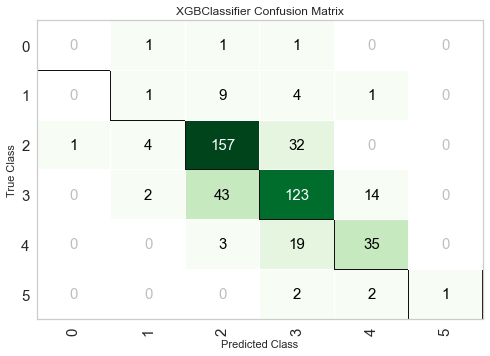

In [12]:
plot_model(xgb_model, plot='confusion_matrix')

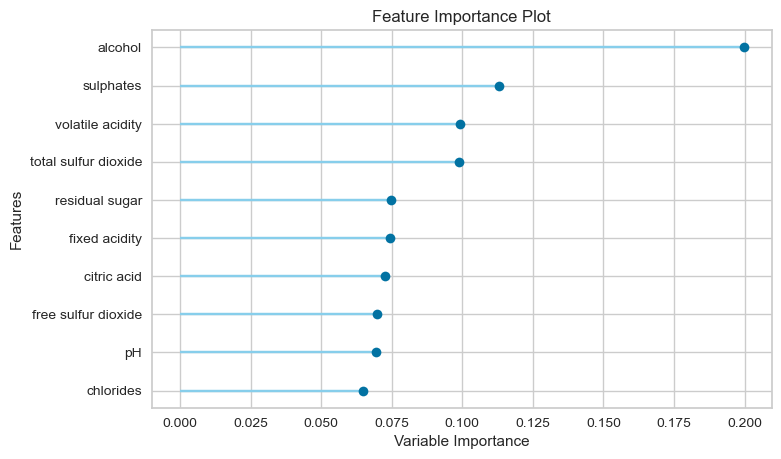

In [13]:
plot_model(xgb_model, plot="feature")

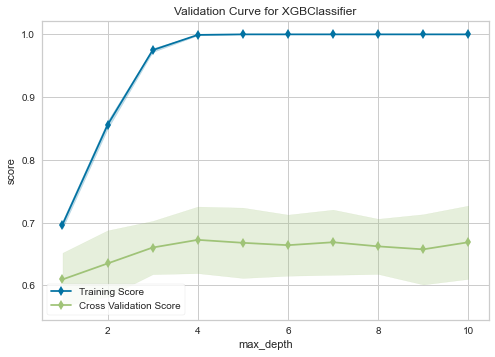

In [14]:
plot_model(xgb_model, plot='vc')

In [15]:
plot_model(xgb_model, plot='parameter')

,Parameters
objective,multi:softprob
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,1
gamma,0
gpu_id,-1
importance_type,gain
interaction_constraints,
